# Artificial Intelligence I: Introduction to Data Science and Machine Learning
# Chapter 4: Time Series & Anomaly Detection
# Flight Load Prediction
* https://www.kaggle.com/datasets/manishmathias/indian-domestic-flight-traffic

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Read Data

In [2]:
df = pd.read_csv('../../data/indian_domestic_flight_traffic/indian domestic Flight Details Year-Month Wise.csv')

df.head()

,AIRLINES,YEAR,MONTH,DEPARTURES\n(IN NUMBER),HOURS\n(IN NUMBER),KILOMETRE\n(IN THOUSAND),PASSENGERS CARRIED\n(IN NUMBER),PASSENGER KMS.PERFORMED\n(IN THOUSAND),AVAILABLE SEAT KILOMETRE\n(IN THOUSAND),PAX.LOAD FACTOR#\n(IN %),FREIGHT\n(IN TONNE),MAIL\n(IN TONNE),TOTAL\n(IN TONNE),PASSENGER\n(IN THOUSAND),FREIGHT\n(IN THOUSAND),MAIL\n(IN THOUSAND),TOTAL\n(IN THOUSAND),AVAILABLE TONNE KILOMETRE\n(IN THOUSAND),WEIGHT LOAD FACTOR##\n(IN %)
0,AIR ASIA,2021,JAN,4495,8590.400000,4621.139,531578,558871.307,836264.022,66.829529,3175.7262,230.1885,3405.9147,37494.472880,4067.437374,269.242257,41831.152510,92422.78,45.260652
1,AIR ASIA,2021,FEB,4340,8239.033333,4417.000,520603,542276.763,798746.808,67.890946,3410.6377,211.8922,3622.5299,39555.584100,4264.010976,251.988624,44071.583700,88341.12,49.887961
2,AIR ASIA,2021,MAR,4727,9023.300000,4855.674,541512,572123.104,878405.634,65.131994,3662.2624,211.7535,3874.0159,38524.441950,4577.131657,280.847992,43382.421600,97113.48,44.671884
3,AIR ASIA,2021,APR,3195,6341.383333,3481.586,354878,403399.335,630122.874,64.019154,2487.1216,169.2380,2656.3596,27963.798660,3332.789591,208.044115,31504.632370,69631.72,45.244656
4,AIR ASIA,2021,MAY,809,1562.150000,867.183,63532,70007.636,157745.280,44.380178,1344.1482,57.5075,1401.6557,4039.994933,1744.005877,114.999778,5899.000588,17343.66,34.012432


In [3]:
df.shape

(1212, 19)

### Rename Columns
* Remove newline (\n) character

In [4]:
column_name_mapping = {}

for column_name in df.columns:
    print(column_name.split('\n'), '--->' , column_name.split('\n')[0].replace('#', '').strip())
    
    column_name_mapping[column_name] = column_name.split('\n')[0].replace('#', '').strip()

['AIRLINES'] ---> AIRLINES
['YEAR'] ---> YEAR
['MONTH'] ---> MONTH
['DEPARTURES', '(IN NUMBER)'] ---> DEPARTURES
['HOURS', '(IN NUMBER)'] ---> HOURS
['KILOMETRE', '(IN THOUSAND)'] ---> KILOMETRE
['PASSENGERS CARRIED', '(IN NUMBER)'] ---> PASSENGERS CARRIED
['PASSENGER KMS.PERFORMED', '(IN THOUSAND)'] ---> PASSENGER KMS.PERFORMED
['AVAILABLE SEAT KILOMETRE', '(IN THOUSAND)'] ---> AVAILABLE SEAT KILOMETRE
[' PAX.LOAD FACTOR#', '(IN %)'] ---> PAX.LOAD FACTOR
[' FREIGHT', '(IN TONNE)'] ---> FREIGHT
['MAIL', '(IN TONNE)'] ---> MAIL
[' TOTAL', '(IN TONNE)'] ---> TOTAL
[' PASSENGER', '(IN THOUSAND)'] ---> PASSENGER
['FREIGHT', '(IN THOUSAND)'] ---> FREIGHT
[' MAIL', '(IN THOUSAND)'] ---> MAIL
[' TOTAL', '(IN THOUSAND)'] ---> TOTAL
['AVAILABLE TONNE KILOMETRE', '(IN THOUSAND)'] ---> AVAILABLE TONNE KILOMETRE
[' WEIGHT LOAD FACTOR##', '(IN %)'] ---> WEIGHT LOAD FACTOR


In [5]:
column_name_mapping

{'AIRLINES': 'AIRLINES',
 'YEAR': 'YEAR',
 'MONTH': 'MONTH',
 'DEPARTURES\n(IN NUMBER)': 'DEPARTURES',
 'HOURS\n(IN NUMBER)': 'HOURS',
 'KILOMETRE\n(IN THOUSAND)': 'KILOMETRE',
 'PASSENGERS CARRIED\n(IN NUMBER)': 'PASSENGERS CARRIED',
 'PASSENGER KMS.PERFORMED\n(IN THOUSAND)': 'PASSENGER KMS.PERFORMED',
 'AVAILABLE SEAT KILOMETRE\n(IN THOUSAND)': 'AVAILABLE SEAT KILOMETRE',
 ' PAX.LOAD FACTOR#\n(IN %)': 'PAX.LOAD FACTOR',
 ' FREIGHT\n(IN TONNE)': 'FREIGHT',
 'MAIL\n(IN TONNE)': 'MAIL',
 ' TOTAL\n(IN TONNE)': 'TOTAL',
 ' PASSENGER\n(IN THOUSAND)': 'PASSENGER',
 'FREIGHT\n(IN THOUSAND)': 'FREIGHT',
 ' MAIL\n(IN THOUSAND)': 'MAIL',
 ' TOTAL\n(IN THOUSAND)': 'TOTAL',
 'AVAILABLE TONNE KILOMETRE\n(IN THOUSAND)': 'AVAILABLE TONNE KILOMETRE',
 ' WEIGHT LOAD FACTOR##\n(IN %)': 'WEIGHT LOAD FACTOR'}

In [6]:
df.rename(columns=column_name_mapping, inplace=True)
df.head()

,AIRLINES,YEAR,MONTH,DEPARTURES,HOURS,KILOMETRE,PASSENGERS CARRIED,PASSENGER KMS.PERFORMED,AVAILABLE SEAT KILOMETRE,PAX.LOAD FACTOR,FREIGHT,MAIL,TOTAL,PASSENGER,FREIGHT,MAIL,TOTAL,AVAILABLE TONNE KILOMETRE,WEIGHT LOAD FACTOR
0,AIR ASIA,2021,JAN,4495,8590.400000,4621.139,531578,558871.307,836264.022,66.829529,3175.7262,230.1885,3405.9147,37494.472880,4067.437374,269.242257,41831.152510,92422.78,45.260652
1,AIR ASIA,2021,FEB,4340,8239.033333,4417.000,520603,542276.763,798746.808,67.890946,3410.6377,211.8922,3622.5299,39555.584100,4264.010976,251.988624,44071.583700,88341.12,49.887961
2,AIR ASIA,2021,MAR,4727,9023.300000,4855.674,541512,572123.104,878405.634,65.131994,3662.2624,211.7535,3874.0159,38524.441950,4577.131657,280.847992,43382.421600,97113.48,44.671884
3,AIR ASIA,2021,APR,3195,6341.383333,3481.586,354878,403399.335,630122.874,64.019154,2487.1216,169.2380,2656.3596,27963.798660,3332.789591,208.044115,31504.632370,69631.72,45.244656
4,AIR ASIA,2021,MAY,809,1562.150000,867.183,63532,70007.636,157745.280,44.380178,1344.1482,57.5075,1401.6557,4039.994933,1744.005877,114.999778,5899.000588,17343.66,34.012432


In [7]:
df.describe()

,YEAR,DEPARTURES,HOURS,KILOMETRE,PASSENGERS CARRIED,PASSENGER KMS.PERFORMED,AVAILABLE SEAT KILOMETRE,PAX.LOAD FACTOR,FREIGHT,MAIL,TOTAL,PASSENGER,FREIGHT,MAIL,TOTAL,AVAILABLE TONNE KILOMETRE,WEIGHT LOAD FACTOR
count,1212.000000,1212.000000,1212.000000,1212.000000,1.212000e+03,1.212000e+03,1.212000e+03,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1.212000e+03,1212.000000,1.212000e+03,1.211000e+03,1211.000000
mean,2017.950495,4498.498350,7652.528744,4100.954495,5.673041e+05,5.450105e+05,6.614746e+05,60.660291,3428.404775,169.902153,3598.306928,47620.250765,3.197543e+05,169.373287,3.675439e+05,5.379598e+05,57.215221
std,1.977794,7446.626301,13029.157852,6749.125811,1.030059e+06,9.966135e+05,1.186025e+06,31.640445,4524.024651,430.773728,4822.807998,88949.199334,1.812965e+06,428.014153,1.807024e+06,2.657888e+06,26.708804
min,2015.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2016.000000,256.000000,329.250000,171.829500,4.217500e+03,2.986500e+03,5.336860e+03,49.891516,0.000000,0.000000,0.000000,424.620000,0.000000e+00,0.000000,1.119200e+03,2.421986e+03,48.598504
50%,2018.000000,1219.000000,2106.850000,1197.500000,1.098160e+05,5.813600e+04,8.417400e+04,74.580247,1073.500000,0.000000,1110.000000,5459.295000,1.263500e+03,0.000000,1.285478e+04,1.992310e+04,68.311264
75%,2020.000000,5823.000000,9855.000000,5584.317000,7.729252e+05,7.462485e+05,9.331318e+05,83.109603,5747.466980,3.000000,6134.000000,65258.529138,6.760775e+03,2.000000,8.173424e+04,1.148512e+05,75.518655
max,2021.000000,44893.000000,78309.180000,39262.646000,6.188457e+06,5.890402e+06,7.195573e+06,97.434509,22166.379000,2878.192090,23861.416000,529046.200200,1.309224e+07,2729.000000,1.309224e+07,2.048424e+07,99.542576


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AIRLINES                   1212 non-null   object 
 1   YEAR                       1212 non-null   int64  
 2   MONTH                      1212 non-null   object 
 3   DEPARTURES                 1212 non-null   int64  
 4   HOURS                      1212 non-null   float64
 5   KILOMETRE                  1212 non-null   float64
 6   PASSENGERS CARRIED         1212 non-null   int64  
 7   PASSENGER KMS.PERFORMED    1212 non-null   float64
 8   AVAILABLE SEAT KILOMETRE   1212 non-null   float64
 9   PAX.LOAD FACTOR            1212 non-null   float64
 10  FREIGHT                    1212 non-null   float64
 11  MAIL                       1212 non-null   float64
 12  TOTAL                      1212 non-null   float64
 13  PASSENGER                  1212 non-null   float

# Handle Missing Values


In [9]:
df.isna().sum()

AIRLINES                     0
YEAR                         0
MONTH                        0
DEPARTURES                   0
HOURS                        0
KILOMETRE                    0
PASSENGERS CARRIED           0
PASSENGER KMS.PERFORMED      0
AVAILABLE SEAT KILOMETRE     0
PAX.LOAD FACTOR              0
FREIGHT                      0
MAIL                         0
TOTAL                        0
PASSENGER                    0
FREIGHT                      0
MAIL                         0
TOTAL                        0
AVAILABLE TONNE KILOMETRE    1
WEIGHT LOAD FACTOR           1
dtype: int64

In [10]:
df['AVAILABLE TONNE KILOMETRE'].fillna(df['AVAILABLE TONNE KILOMETRE'].mean(), inplace=True)
df['WEIGHT LOAD FACTOR'].fillna(df['WEIGHT LOAD FACTOR'].mean(), inplace=True)

In [11]:
df.isna().sum()

AIRLINES                     0
YEAR                         0
MONTH                        0
DEPARTURES                   0
HOURS                        0
KILOMETRE                    0
PASSENGERS CARRIED           0
PASSENGER KMS.PERFORMED      0
AVAILABLE SEAT KILOMETRE     0
PAX.LOAD FACTOR              0
FREIGHT                      0
MAIL                         0
TOTAL                        0
PASSENGER                    0
FREIGHT                      0
MAIL                         0
TOTAL                        0
AVAILABLE TONNE KILOMETRE    0
WEIGHT LOAD FACTOR           0
dtype: int64

# Visualization

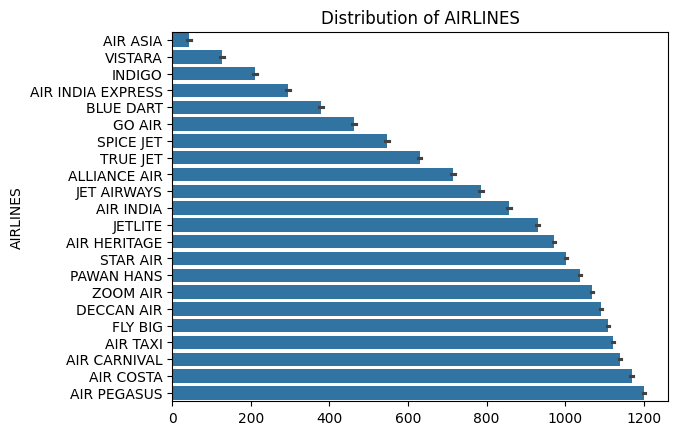

In [12]:
sns.barplot(df['AIRLINES'])
plt.title('Distribution of AIRLINES')
plt.show()

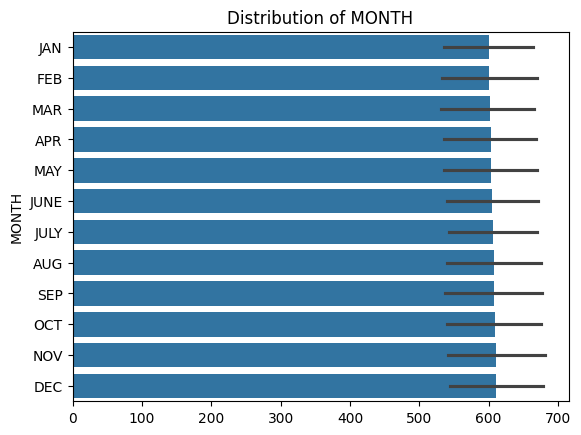

In [13]:
sns.barplot(df['MONTH'])
plt.title('Distribution of MONTH')
plt.show()

# Feature Selection

Text(0.5, 1.0, 'Correlation Matrix')

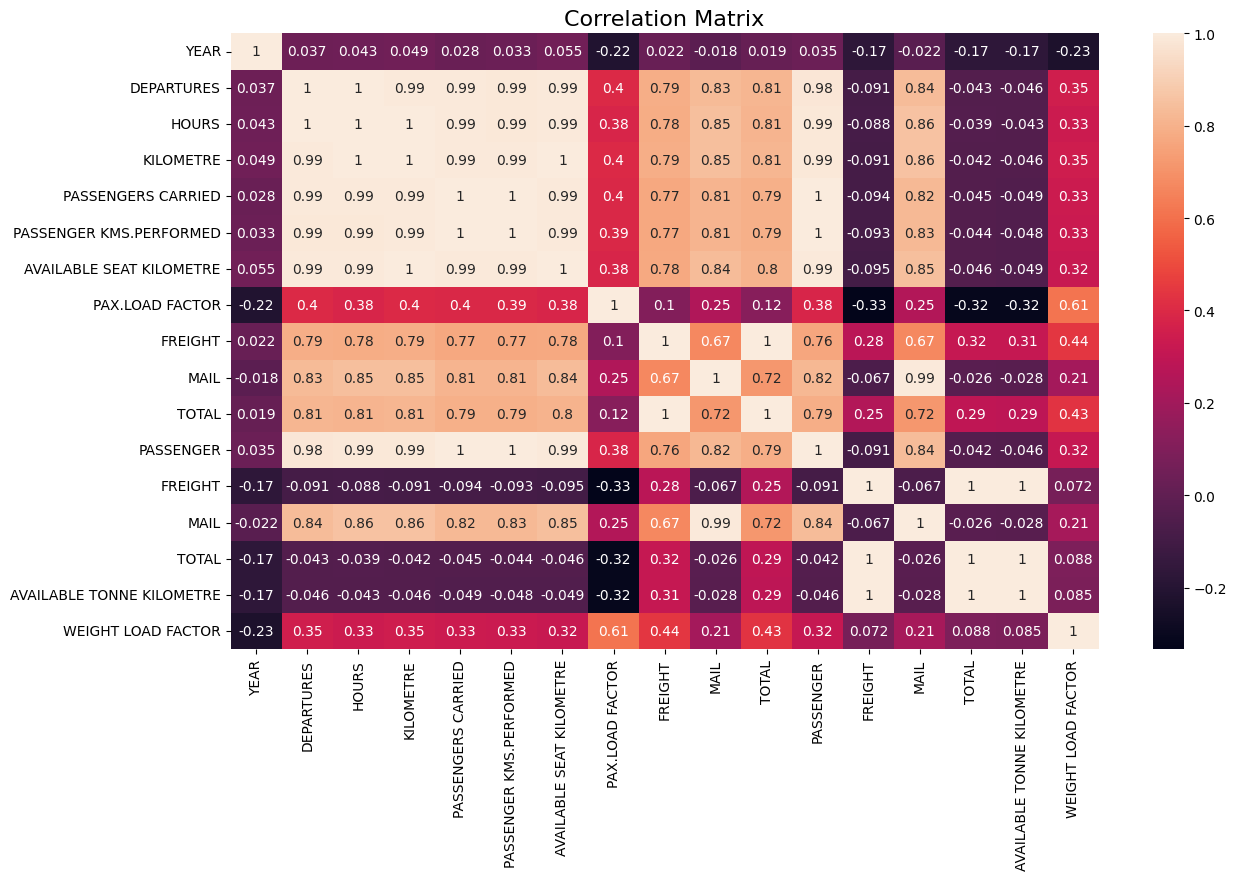

In [14]:
corr = df.drop(['AIRLINES', 'MONTH'], axis=1).corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr, vmax=1.0, annot=True)
plt.title('Correlation Matrix', fontsize=16)

# Train (fit) Model

In [15]:
features = df.drop(['PAX.LOAD FACTOR', 'AIRLINES', 'MONTH'], axis=1)
target = df['PAX.LOAD FACTOR']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

print(f'X_train shape:', X_train.shape)
print(f'y_train shape:', y_train.shape)

print(f'X_val shape:', X_test.shape)
print(f'y_val:', y_test.shape)

X_train shape: (969, 16)
y_train shape: (969,)
X_val shape: (243, 16)
y_val: (243,)


### Fit Linear Regression

In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.742022507060266

### Fit Random Forest Regressor

In [17]:
rf_model = RandomForestRegressor(n_estimators=10)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9830249831491834

# Results
### Linear Regression Predictions

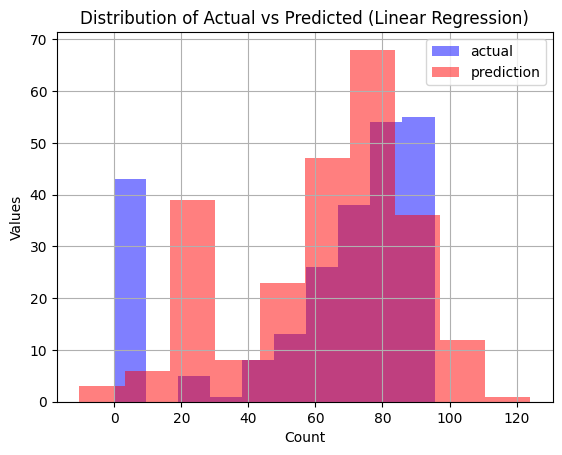

In [18]:
y_pred = linear_model.predict(X_test)

plt.hist(y_test.values, color='b', label='actual', alpha=0.5)
plt.hist(y_pred, color='r', label='prediction', alpha=0.5)
plt.title('Distribution of Actual vs Predicted (Linear Regression)')
plt.xlabel('Count')
plt.ylabel('Values')
plt.legend()
plt.grid('on')

### Random Forest Regression Predictions

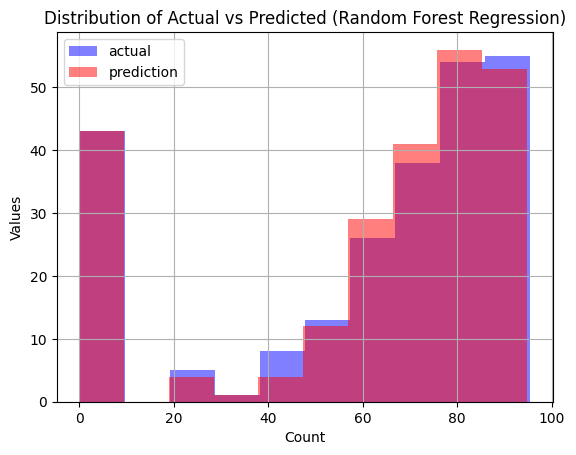

In [19]:
y_pred = rf_model.predict(X_test)

plt.hist(y_test.values, color='b', label='actual', alpha=0.5)
plt.hist(y_pred, color='r', label='prediction', alpha=0.5)
plt.title('Distribution of Actual vs Predicted (Random Forest Regression)')
plt.xlabel('Count')
plt.ylabel('Values')
plt.legend()
plt.grid('on')

# Feature Importances (Random Forest)

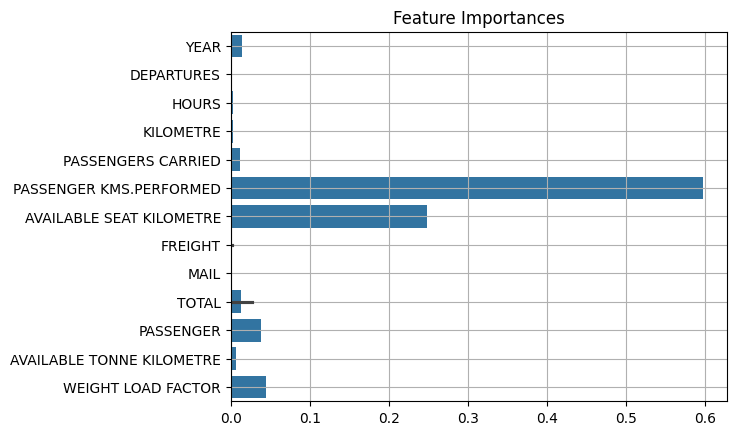

In [20]:
sns.barplot(x=rf_model.feature_importances_, y=list(features.columns))
plt.title('Feature Importances')
plt.grid('on')
plt.show()

# Relationship of Different Airway Companies
### All Companies

In [21]:
all_airway_companies = df['AIRLINES'].unique().tolist()
all_airway_companies

['AIR ASIA',
 'VISTARA',
 'INDIGO',
 'AIR INDIA EXPRESS',
 'BLUE DART',
 'GO AIR',
 'SPICE JET',
 'TRUE JET',
 'ALLIANCE AIR',
 'JET AIRWAYS',
 'AIR INDIA',
 'JETLITE',
 'AIR HERITAGE',
 'STAR AIR',
 'PAWAN HANS',
 'ZOOM AIR',
 'DECCAN AIR',
 'FLY BIG',
 'AIR TAXI',
 'AIR CARNIVAL',
 'AIR COSTA',
 'AIR PEGASUS']

### Counts of Company Data

In [22]:
df['AIRLINES'].value_counts()

AIRLINES
AIR ASIA             84
AIR INDIA            84
INDIGO               84
AIR INDIA EXPRESS    84
BLUE DART            84
GO AIR               84
SPICE JET            84
TRUE JET             84
ALLIANCE AIR         84
VISTARA              84
JETLITE              60
JET AIRWAYS          60
STAR AIR             36
PAWAN HANS           36
AIR COSTA            36
AIR HERITAGE         24
ZOOM AIR             24
DECCAN AIR           24
AIR CARNIVAL         24
AIR PEGASUS          24
FLY BIG              12
AIR TAXI             12
Name: count, dtype: int64

### Select Base Company 'AIR ASIA' for Referance

In [23]:
BASE_COMPANY = 'AIR ASIA'
df_airlines = df[df['AIRLINES'] == BASE_COMPANY].copy()
df_airlines.head()

,AIRLINES,YEAR,MONTH,DEPARTURES,HOURS,KILOMETRE,PASSENGERS CARRIED,PASSENGER KMS.PERFORMED,AVAILABLE SEAT KILOMETRE,PAX.LOAD FACTOR,FREIGHT,MAIL,TOTAL,PASSENGER,FREIGHT,MAIL,TOTAL,AVAILABLE TONNE KILOMETRE,WEIGHT LOAD FACTOR
0,AIR ASIA,2021,JAN,4495,8590.400000,4621.139,531578,558871.307,836264.022,66.829529,3175.7262,230.1885,3405.9147,37494.472880,4067.437374,269.242257,41831.152510,92422.78,45.260652
1,AIR ASIA,2021,FEB,4340,8239.033333,4417.000,520603,542276.763,798746.808,67.890946,3410.6377,211.8922,3622.5299,39555.584100,4264.010976,251.988624,44071.583700,88341.12,49.887961
2,AIR ASIA,2021,MAR,4727,9023.300000,4855.674,541512,572123.104,878405.634,65.131994,3662.2624,211.7535,3874.0159,38524.441950,4577.131657,280.847992,43382.421600,97113.48,44.671884
3,AIR ASIA,2021,APR,3195,6341.383333,3481.586,354878,403399.335,630122.874,64.019154,2487.1216,169.2380,2656.3596,27963.798660,3332.789591,208.044115,31504.632370,69631.72,45.244656
4,AIR ASIA,2021,MAY,809,1562.150000,867.183,63532,70007.636,157745.280,44.380178,1344.1482,57.5075,1401.6557,4039.994933,1744.005877,114.999778,5899.000588,17343.66,34.012432


In [24]:
df_airlines = df_airlines['PAX.LOAD FACTOR'].to_frame()

# should be the shape of BASE_COMPANY
SHAPE_FILTER = (84,)
# The most important feature (according to Random Forest)
SELECTED_FEATURE = 'PASSENGER KMS.PERFORMED'

for company in all_airway_companies:
    if company == BASE_COMPANY:
        continue
    
    df_company_selected = df[df['AIRLINES'] == company]

    selected_feature = df_company_selected[SELECTED_FEATURE].values.copy()

    if selected_feature.shape == SHAPE_FILTER:
        # PKP: PASSENGER KMS.PERFORMED
        df_airlines[f'{company}_PKP'] = selected_feature
    else:
        print(f'SKIPPED shape: {selected_feature.shape}, company: {company}')

SKIPPED shape: (60,), company: JET AIRWAYS
SKIPPED shape: (60,), company: JETLITE
SKIPPED shape: (24,), company: AIR HERITAGE
SKIPPED shape: (36,), company: STAR AIR
SKIPPED shape: (36,), company: PAWAN HANS
SKIPPED shape: (24,), company: ZOOM AIR
SKIPPED shape: (24,), company: DECCAN AIR
SKIPPED shape: (12,), company: FLY BIG
SKIPPED shape: (12,), company: AIR TAXI
SKIPPED shape: (24,), company: AIR CARNIVAL
SKIPPED shape: (36,), company: AIR COSTA
SKIPPED shape: (24,), company: AIR PEGASUS


### Final Dataframe for Correlation Analysis

In [25]:
df_airlines.columns

Index(['PAX.LOAD FACTOR', 'VISTARA_PKP', 'INDIGO_PKP', 'AIR INDIA EXPRESS_PKP',
       'BLUE DART_PKP', 'GO AIR_PKP', 'SPICE JET_PKP', 'TRUE JET_PKP',
       'ALLIANCE AIR_PKP', 'AIR INDIA_PKP'],
      dtype='object')

In [26]:
df_airlines.head()

,PAX.LOAD FACTOR,VISTARA_PKP,INDIGO_PKP,AIR INDIA EXPRESS_PKP,BLUE DART_PKP,GO AIR_PKP,SPICE JET_PKP,TRUE JET_PKP,ALLIANCE AIR_PKP,AIR INDIA_PKP
0,66.829529,563747.721,3983767.0,5566.496,0.0,619864.761,1042368.244,16923.337,36600.0,729220.203
1,67.890946,599906.941,4039127.0,3138.000,0.0,562958.335,991225.375,18083.723,37382.0,849666.055
2,65.131994,565503.537,4038028.0,1306.000,0.0,589514.952,1038941.395,15975.497,38098.0,850171.134
3,64.019154,356306.752,3056489.0,0.000,0.0,537578.093,753476.549,9205.000,25269.0,575346.811
4,44.380178,108606.828,1168028.0,0.000,0.0,124752.207,225662.506,4636.983,12178.0,328374.717


### Correlation of PAX.LOAD FACTOR of AIR ASIA to Other Companies

Text(0.5, 1.0, 'Correlation Matrix')

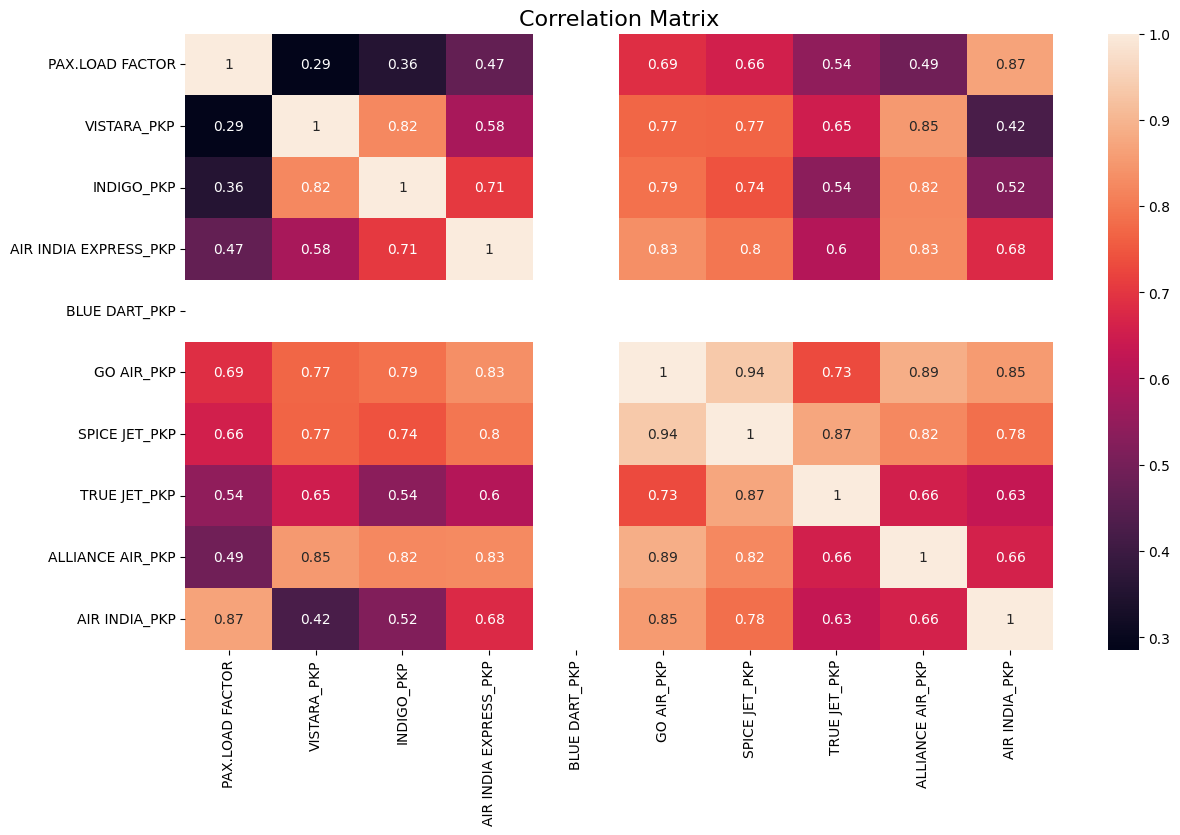

In [27]:
corr = df_airlines.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr, vmax=1.0, annot=True)
plt.title('Correlation Matrix', fontsize=16)

# Another Example

### Select Base Company 'INDIGO' for Referance

In [28]:
BASE_COMPANY = 'INDIGO'
df_airlines = df[df['AIRLINES'] == BASE_COMPANY].copy()
df_airlines.head()

,AIRLINES,YEAR,MONTH,DEPARTURES,HOURS,KILOMETRE,PASSENGERS CARRIED,PASSENGER KMS.PERFORMED,AVAILABLE SEAT KILOMETRE,PAX.LOAD FACTOR,FREIGHT,MAIL,TOTAL,PASSENGER,FREIGHT,MAIL,TOTAL,AVAILABLE TONNE KILOMETRE,WEIGHT LOAD FACTOR
168,INDIGO,2021,JAN,34461,61464.90,31362.842,4202712,3983767.0,5746935.0,69.319855,16154.85531,2151.00530,18305.86061,358449.5231,18385.23342,1964.640118,378799.3967,602126.9502,62.910221
169,INDIGO,2021,FEB,32690,58239.43,29692.342,4238466,4039127.0,5431221.0,74.368673,16743.80505,2101.37318,18845.17823,363480.5081,18924.99126,1861.830594,384267.3300,571151.9802,67.279348
170,INDIGO,2021,MAR,36601,64873.20,33192.901,4184920,4038028.0,6081170.0,66.402156,19304.06328,2101.24639,21405.30967,363374.0592,21553.92366,1965.491131,386893.4740,643066.8667,60.163802
171,INDIGO,2021,APR,31374,54525.38,28324.744,3083318,3056489.0,5208190.0,58.686204,17706.90220,1732.68625,19439.58845,275067.8144,19756.39823,1649.007340,296473.2200,552999.0364,53.611887
172,INDIGO,2021,MAY,14121,24389.03,12702.033,1168738,1168028.0,2281799.0,51.188908,12146.47000,1224.56100,13371.03100,105073.8278,13674.42344,1115.479356,119863.7305,241919.2506,49.547000


In [29]:
df_airlines = df_airlines['PAX.LOAD FACTOR'].to_frame()

# should be the shape of BASE_COMPANY
SHAPE_FILTER = (84,)
# The most important feature (according to Random Forest)
SELECTED_FEATURE = 'PASSENGER KMS.PERFORMED'

for company in all_airway_companies:
    if company == BASE_COMPANY:
        continue
    
    df_company_selected = df[df['AIRLINES'] == company]

    selected_feature = df_company_selected[SELECTED_FEATURE].values.copy()

    if selected_feature.shape == SHAPE_FILTER:
        # PKP: PASSENGER KMS.PERFORMED
        df_airlines[f'{company}_PKP'] = selected_feature
    else:
        print(f'SKIPPED shape: {selected_feature.shape}, company: {company}')

SKIPPED shape: (60,), company: JET AIRWAYS
SKIPPED shape: (60,), company: JETLITE
SKIPPED shape: (24,), company: AIR HERITAGE
SKIPPED shape: (36,), company: STAR AIR
SKIPPED shape: (36,), company: PAWAN HANS
SKIPPED shape: (24,), company: ZOOM AIR
SKIPPED shape: (24,), company: DECCAN AIR
SKIPPED shape: (12,), company: FLY BIG
SKIPPED shape: (12,), company: AIR TAXI
SKIPPED shape: (24,), company: AIR CARNIVAL
SKIPPED shape: (36,), company: AIR COSTA
SKIPPED shape: (24,), company: AIR PEGASUS


### Final Dataframe for Correlation Analysis

In [30]:
df_airlines.columns

Index(['PAX.LOAD FACTOR', 'AIR ASIA_PKP', 'VISTARA_PKP',
       'AIR INDIA EXPRESS_PKP', 'BLUE DART_PKP', 'GO AIR_PKP', 'SPICE JET_PKP',
       'TRUE JET_PKP', 'ALLIANCE AIR_PKP', 'AIR INDIA_PKP'],
      dtype='object')

In [31]:
df_airlines.head()

,PAX.LOAD FACTOR,AIR ASIA_PKP,VISTARA_PKP,AIR INDIA EXPRESS_PKP,BLUE DART_PKP,GO AIR_PKP,SPICE JET_PKP,TRUE JET_PKP,ALLIANCE AIR_PKP,AIR INDIA_PKP
168,69.319855,558871.307,563747.721,5566.496,0.0,619864.761,1042368.244,16923.337,36600.0,729220.203
169,74.368673,542276.763,599906.941,3138.000,0.0,562958.335,991225.375,18083.723,37382.0,849666.055
170,66.402156,572123.104,565503.537,1306.000,0.0,589514.952,1038941.395,15975.497,38098.0,850171.134
171,58.686204,403399.335,356306.752,0.000,0.0,537578.093,753476.549,9205.000,25269.0,575346.811
172,51.188908,70007.636,108606.828,0.000,0.0,124752.207,225662.506,4636.983,12178.0,328374.717


### Correlation of PAX.LOAD FACTOR of INDIGO to Other Companies

Text(0.5, 1.0, 'Correlation Matrix')

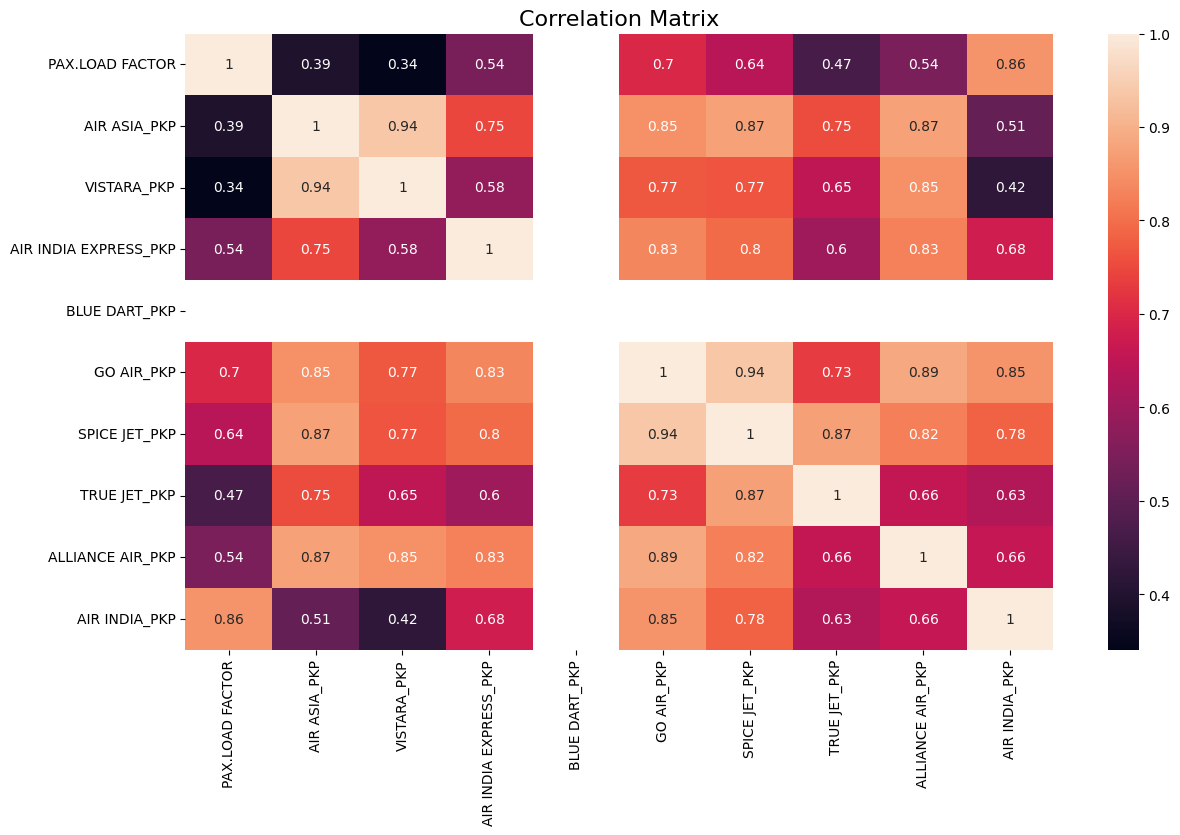

In [32]:
corr = df_airlines.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr, vmax=1.0, annot=True)
plt.title('Correlation Matrix', fontsize=16)